In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mouse_viral_study.csv')

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


EDA

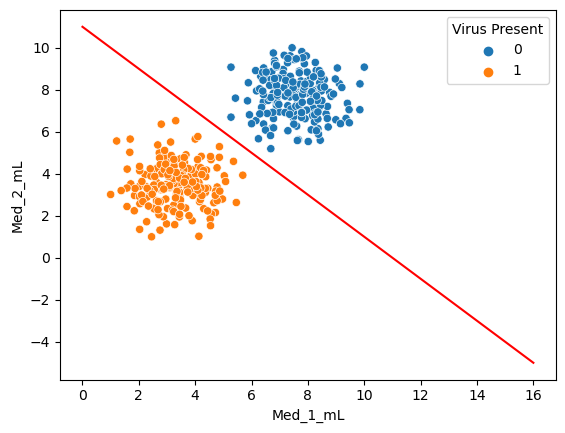

In [5]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df)

# help me draw a line with intercept 11
x = np.linspace(0, 16, 100)
y = -x + 11
plt.plot(x, y, '-r')
plt.show()

# SVM

In [6]:
from sklearn.svm import SVC

In [7]:
X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

In [8]:
svm_lin = SVC(kernel='linear', C=1)
svm_lin.fit(X, y)

SVC(C=1, kernel='linear')

In [9]:
from svm_margin_plot import plot_svm_boundary

c:\Users\kaps1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


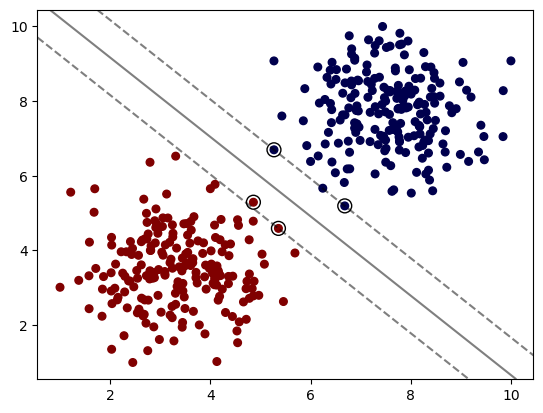

In [10]:
plot_svm_boundary(svm_lin, X, y)

# Hyper parameter C

# Radial Basis Function

c:\Users\kaps1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


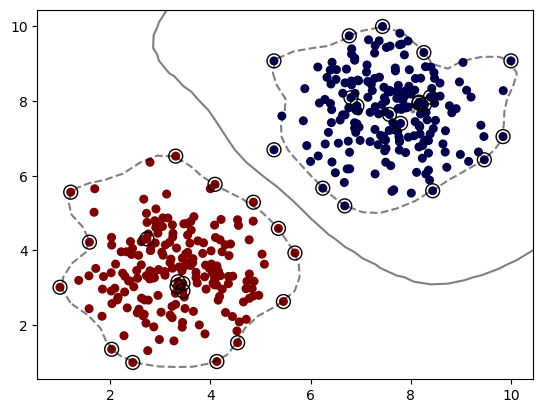

In [11]:
svm_rbf = SVC(kernel='rbf', C=1, gamma = 'auto')
svm_rbf.fit(X, y)
plot_svm_boundary(svm_rbf, X, y)

# Polynomial Kernel

c:\Users\kaps1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


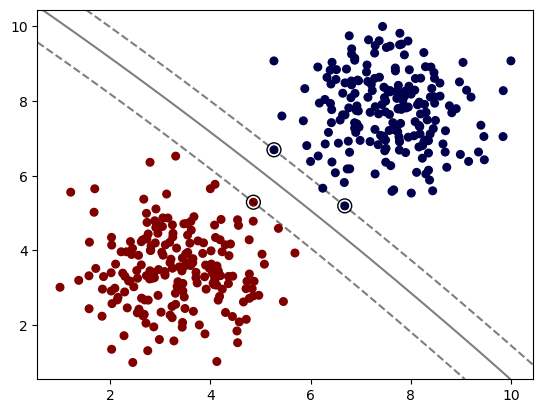

In [12]:
svm_poly = SVC(kernel='poly', C=1, degree=3)
svm_poly.fit(X, y)
plot_svm_boundary(svm_poly, X, y)

# Grid Search

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
svm_gs = SVC()
param_grid = {'C':[0.01, 0.1, 1, 10, 100], 'kernel':['linear', 'rbf', 'poly', 'sigmoid'], 'degree':[2,3,4,5]}
grid = GridSearchCV(svm_gs, param_grid)

In [15]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4, 5],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [16]:
grid.best_params_

{'C': 0.01, 'degree': 2, 'kernel': 'linear'}